In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [2]:
#import datasets
df = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\train (3).csv") 


In [3]:
df.head()

,Row ID,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,0,184.0,86.0,190.0,213.0,6.0,923.0,623.0,28,22.93
1,1,313.3,145.0,0.0,178.5,8.0,1001.9,688.7,28,41.05
2,2,387.0,20.0,94.0,157.0,13.9,938.0,845.0,7,45.90
3,3,162.0,214.0,164.0,202.0,10.0,820.0,680.0,28,30.65
4,4,252.3,0.0,98.8,146.3,14.2,987.8,889.0,14,42.29


In [4]:
#Data Pre-processing 
df.shape

(721, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Row ID            721 non-null    int64  
 1   cement            721 non-null    float64
 2   slag              721 non-null    float64
 3   flyash            721 non-null    float64
 4   water             721 non-null    float64
 5   superplasticizer  721 non-null    float64
 6   coarseaggregate   721 non-null    float64
 7   fineaggregate     721 non-null    float64
 8   age               721 non-null    int64  
 9   csMPa             721 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.5 KB


In [6]:
#Categorical Features:
#categorical_features = [column_name for column_name in df.columns if df[column_name].dtype == '0']
#print(f'Number of Categorical Features:{categorical_features}'.format(len(categorical_features)))
#print(f'Categorical Features:', categorical_features) 

In [7]:
categorical_features = [column_name for column_name in df.columns if df[column_name].dtype == '0']
print("Number of Categorical Features:{}".format(len(categorical_features)))
print("Categorical Features:",categorical_features) 

Number of Categorical Features:0
Categorical Features: []


In [8]:
numerical_features = [column_name for column_name in df.columns if df[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)


Number of Numerical Features: 10
Numerical Features:  ['Row ID', 'cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age', 'csMPa']


In [9]:
#finding unique values 
for each_feature in categorical_features:
    print("Cardinality(no. of unique values) of {} are: {}".format(each_feature,len(df[each_feature].unique())))


In [10]:
df.drop('Row ID', axis = 1, inplace = True) 

In [11]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,184.0,86.0,190.0,213.0,6.0,923.0,623.0,28,22.93
1,313.3,145.0,0.0,178.5,8.0,1001.9,688.7,28,41.05
2,387.0,20.0,94.0,157.0,13.9,938.0,845.0,7,45.90
3,162.0,214.0,164.0,202.0,10.0,820.0,680.0,28,30.65
4,252.3,0.0,98.8,146.3,14.2,987.8,889.0,14,42.29


In [12]:
#checking NULL values for categorical
categorical_features = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 0
Categorical Features:  []


In [13]:
#checking NULL values for numerical
numerical_features = [column_name for column_name in df.columns if df[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 9
Numerical Features:  ['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age', 'csMPa']


In [14]:
#Checking for Null values:
df[categorical_features].isnull().sum() 

Series([], dtype: float64)

In [15]:
#categorical features whihc has NUll Values:
categorical_features_with_null = [feature for feature in categorical_features if df[feature].isnull().sum()]


In [16]:
#handing NULL values in numerical features
# checking null values in numerical features

df[numerical_features].isnull().sum()


cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,721.0,280.629681,103.113264,102.00,194.70,273.00,359.00,540.0
slag,721.0,74.736338,85.698317,0.00,0.00,24.00,142.80,359.4
flyash,721.0,54.874064,63.334382,0.00,0.00,0.00,118.20,200.0
water,721.0,181.029820,21.572810,121.80,164.90,184.00,192.00,247.0
superplasticizer,721.0,6.503190,5.995274,0.00,0.00,6.90,10.60,32.2
coarseaggregate,721.0,971.401664,76.522551,801.00,932.00,967.00,1028.40,1134.3
fineaggregate,721.0,775.125798,78.886793,594.00,734.00,780.00,825.00,992.6
age,721.0,44.951456,60.426508,1.00,14.00,28.00,56.00,365.0
csMPa,721.0,36.163148,17.195567,2.33,23.35,34.57,47.71,82.6


(9.5, -0.5)

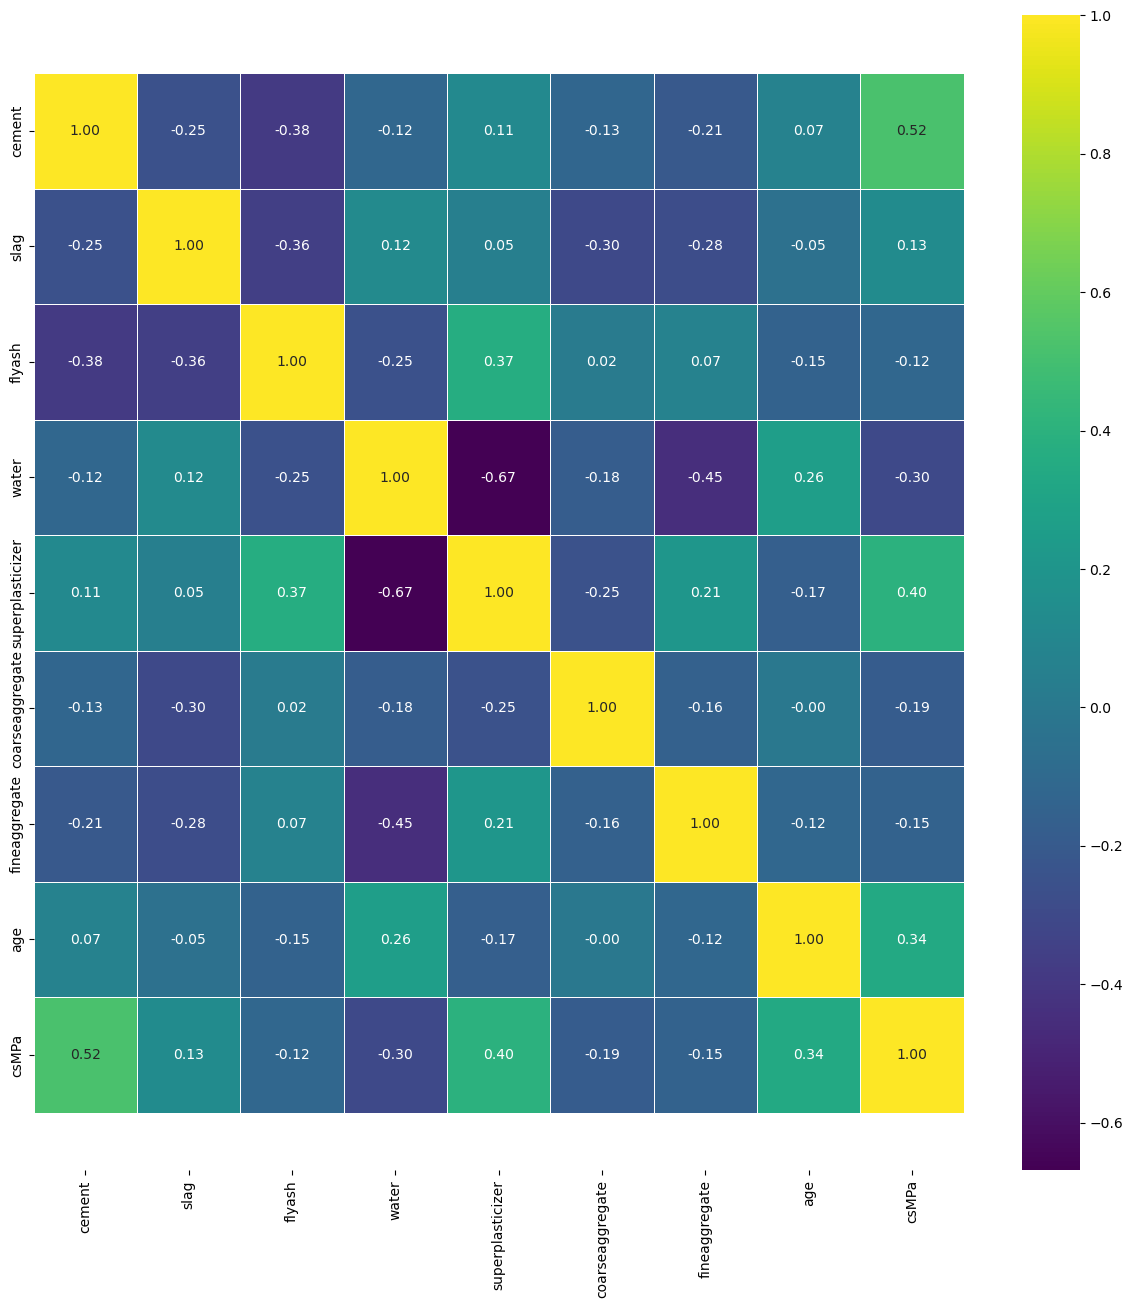

In [18]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5,fmt=".2f", cmap="viridis");                                  
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) 

<Axes: title={'center': 'Correlation with csMPa )'}>

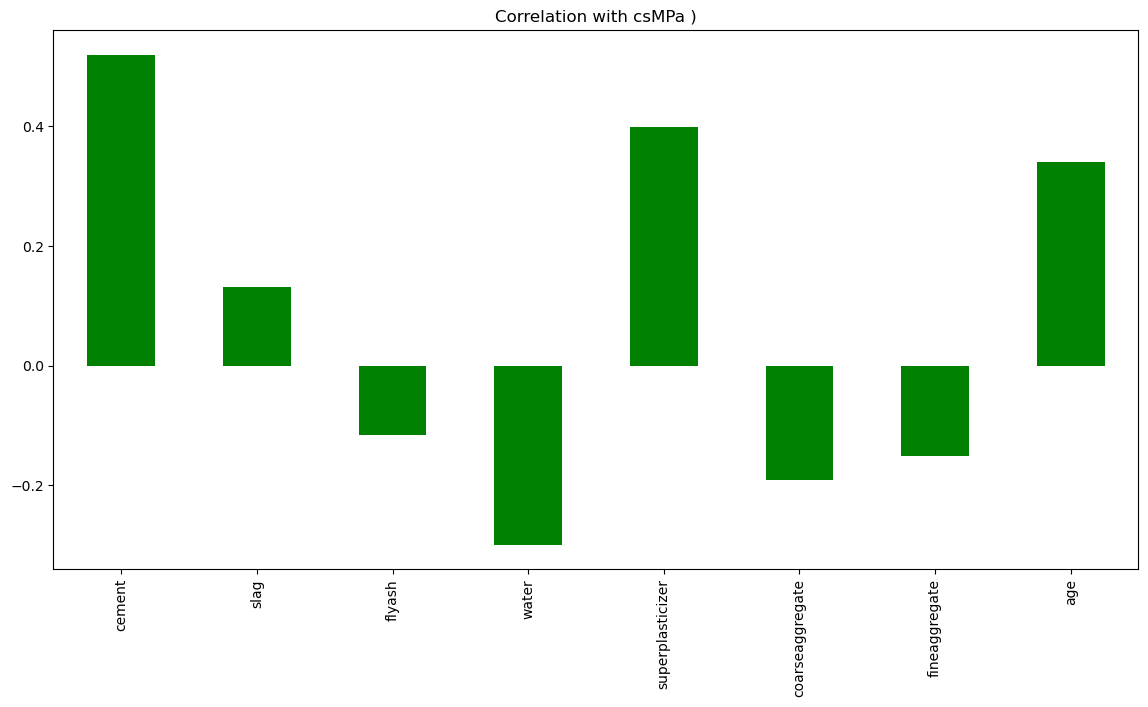

In [19]:
df.drop('csMPa', axis=1).corrwith(df.csMPa).plot(kind='bar', color='Green', figsize=(14, 7), title="Correlation with csMPa )") 

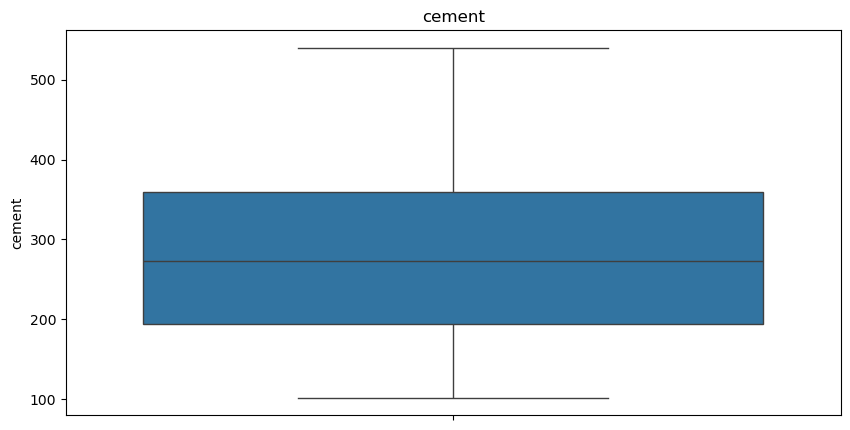

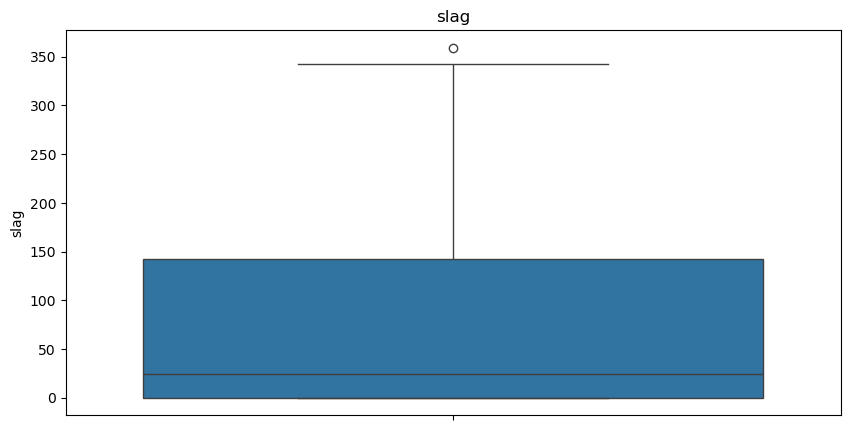

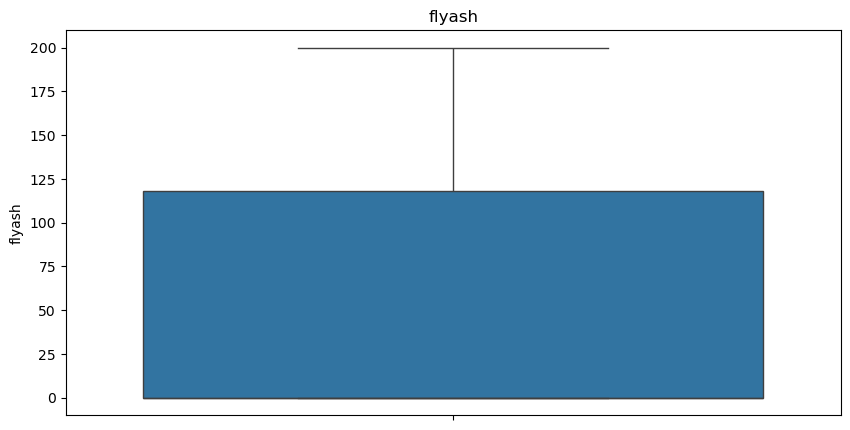

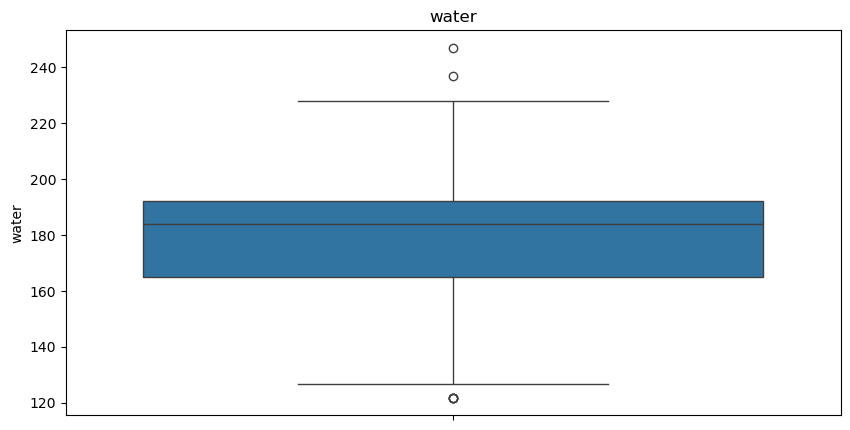

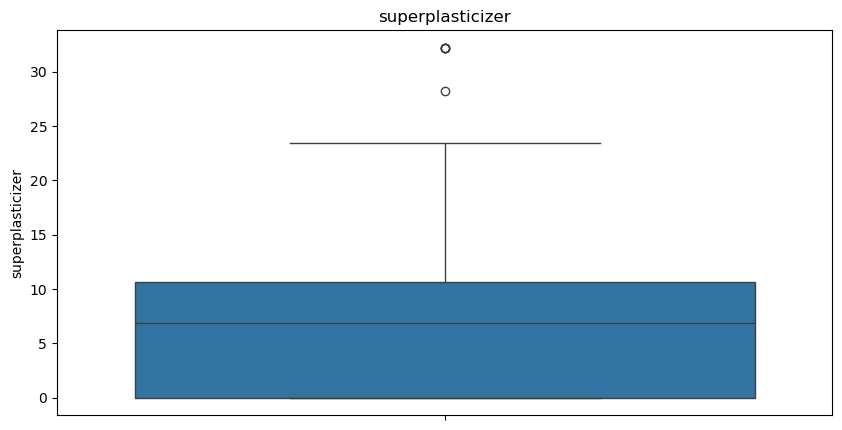

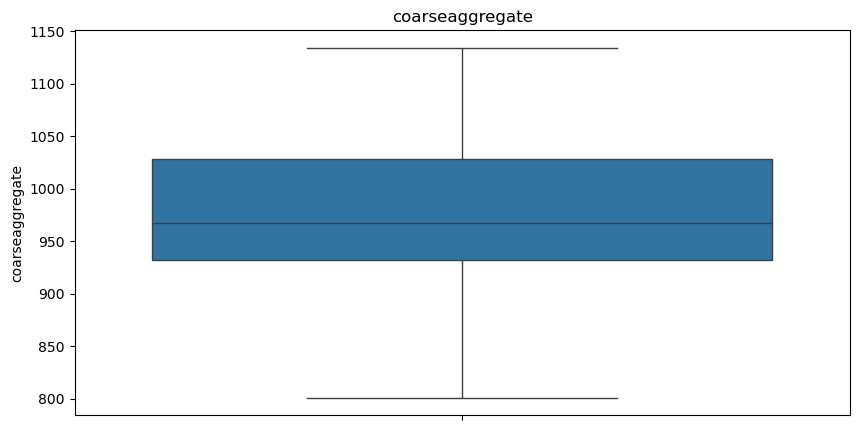

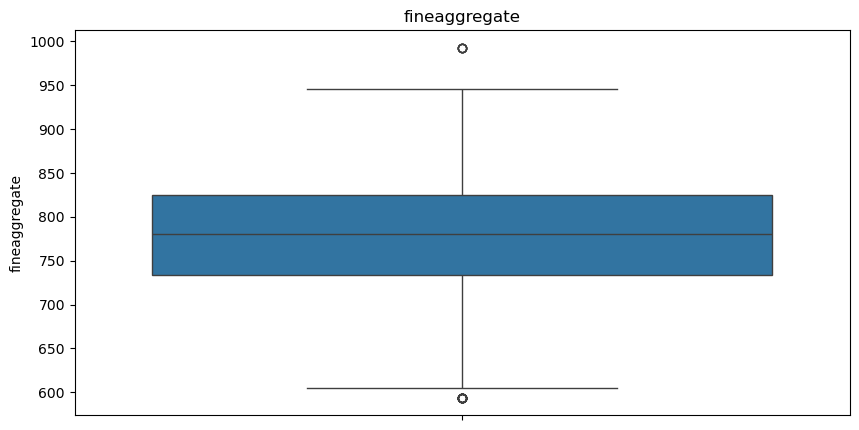

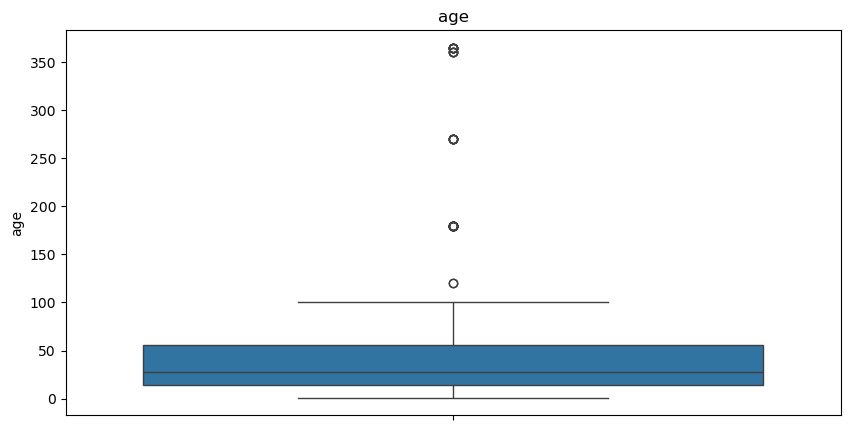

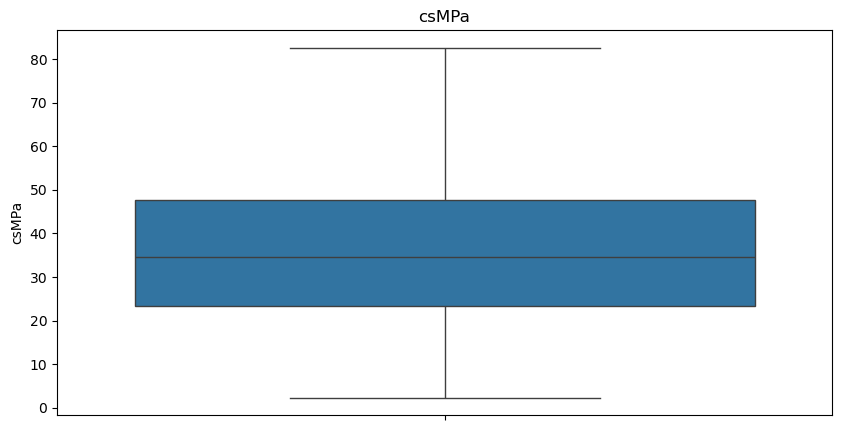

In [20]:
#checking for outliers in numeric values
for feature in numerical_features:
    plt.figure(figsize=(10,5))
    sns.boxplot(df[feature])
    plt.title(feature)

In [21]:
# checking for outliers using the statistical formulas:

df[numerical_features].describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,721.000000,721.000000,721.000000,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,280.629681,74.736338,54.874064,181.02982,6.503190,971.401664,775.125798,44.951456,36.163148
std,103.113264,85.698317,63.334382,21.57281,5.995274,76.522551,78.886793,60.426508,17.195567
min,102.000000,0.000000,0.000000,121.80000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,194.700000,0.000000,0.000000,164.90000,0.000000,932.000000,734.000000,14.000000,23.350000
50%,273.000000,24.000000,0.000000,184.00000,6.900000,967.000000,780.000000,28.000000,34.570000
75%,359.000000,142.800000,118.200000,192.00000,10.600000,1028.400000,825.000000,56.000000,47.710000
max,540.000000,359.400000,200.000000,247.00000,32.200000,1134.300000,992.600000,365.000000,82.600000


In [22]:
features_with_outliers = ['cement', 'slag', 'flyash','water','superplasticizer','coarseaggregate','fineaggregate','age','csMPa'] 

In [23]:
# Replacing outliers using IQR:

for feature in features_with_outliers:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit

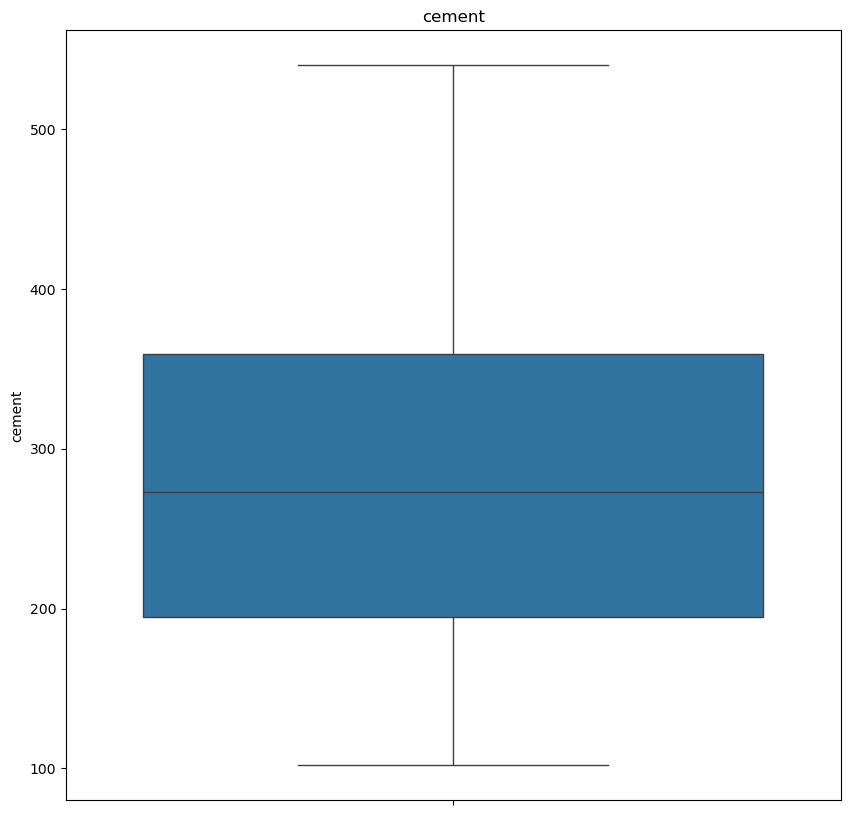

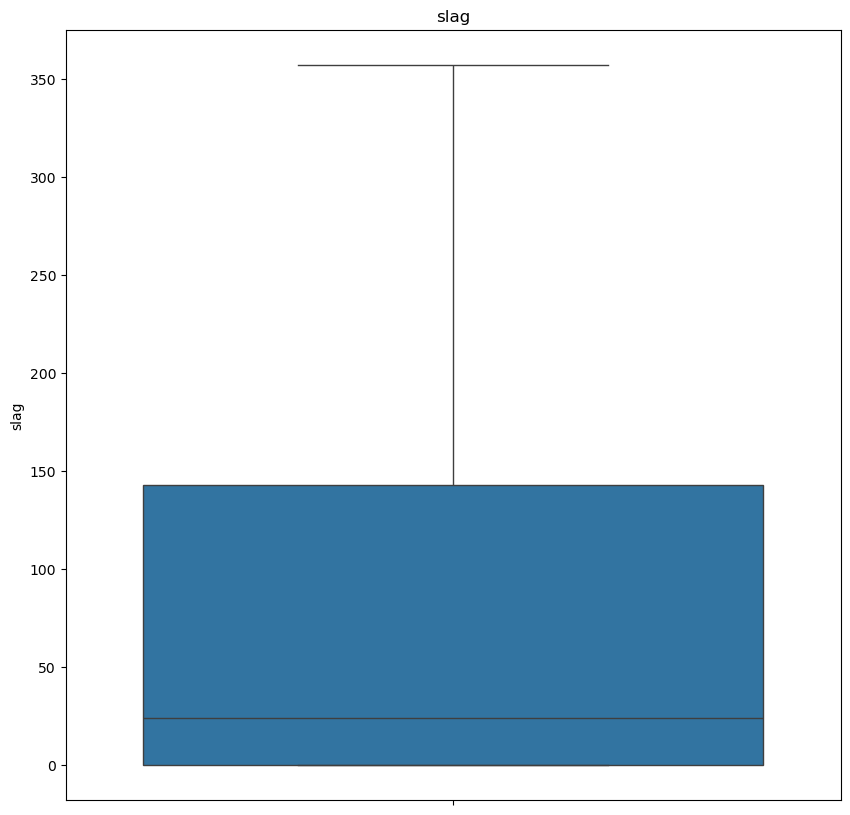

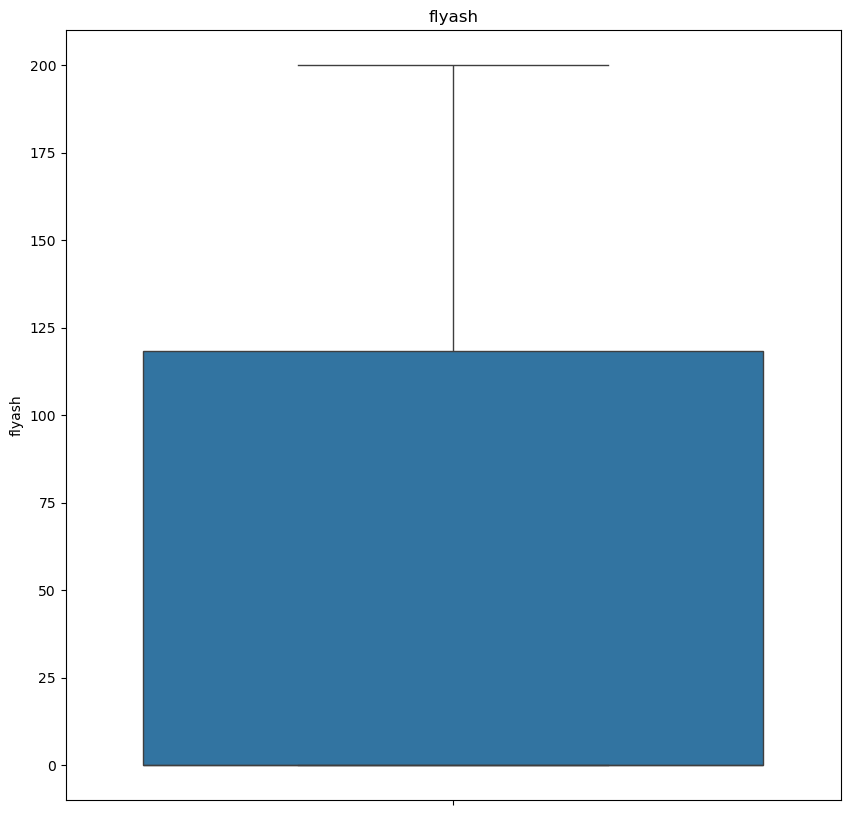

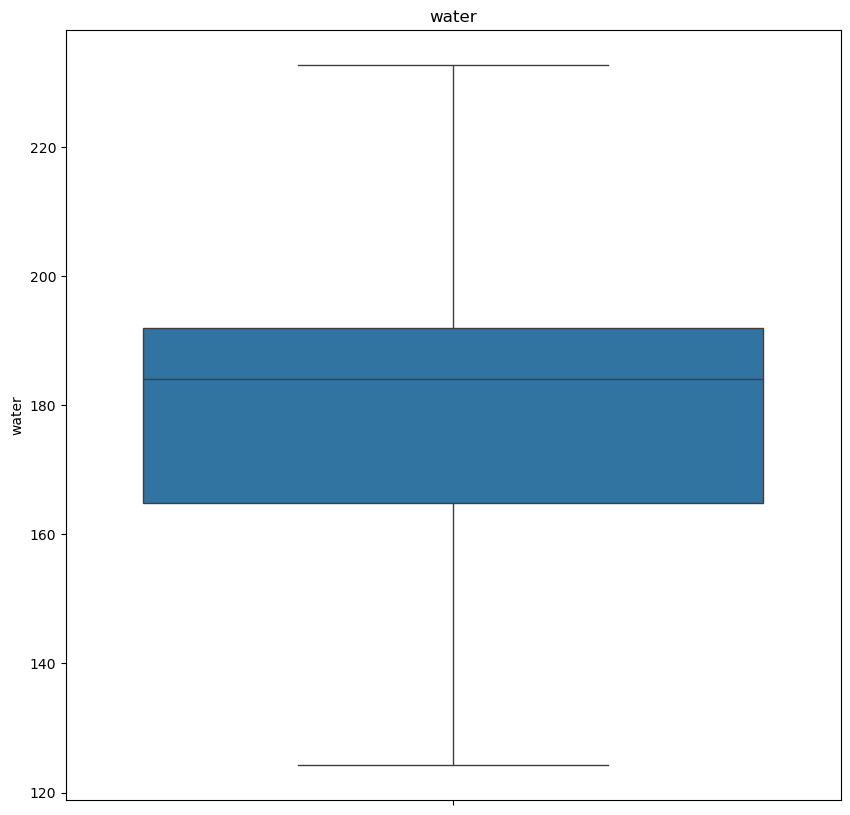

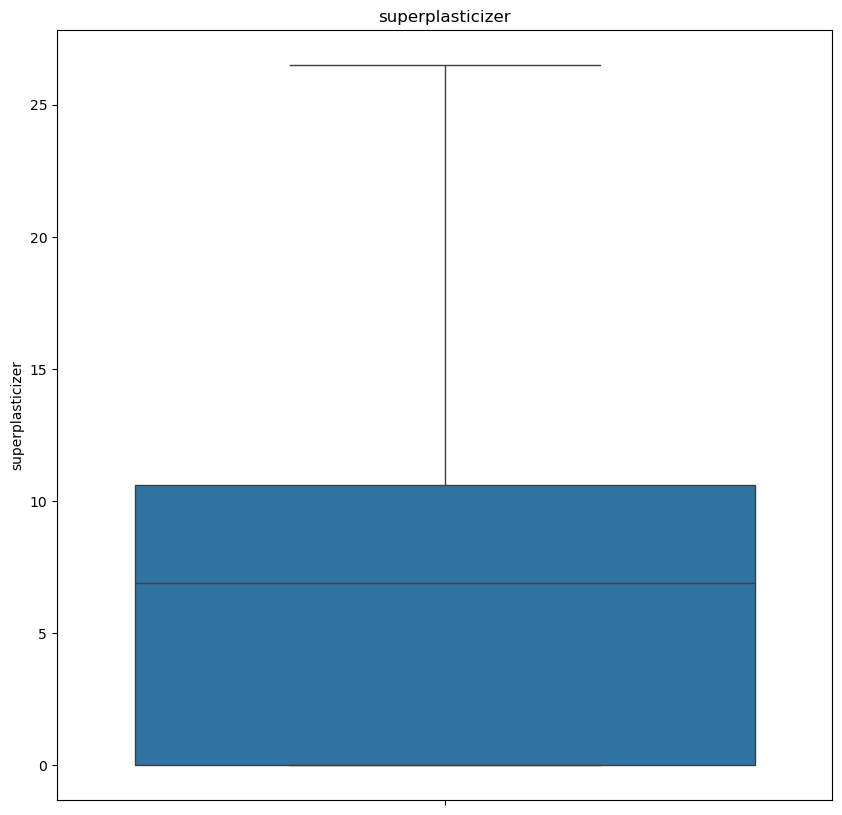

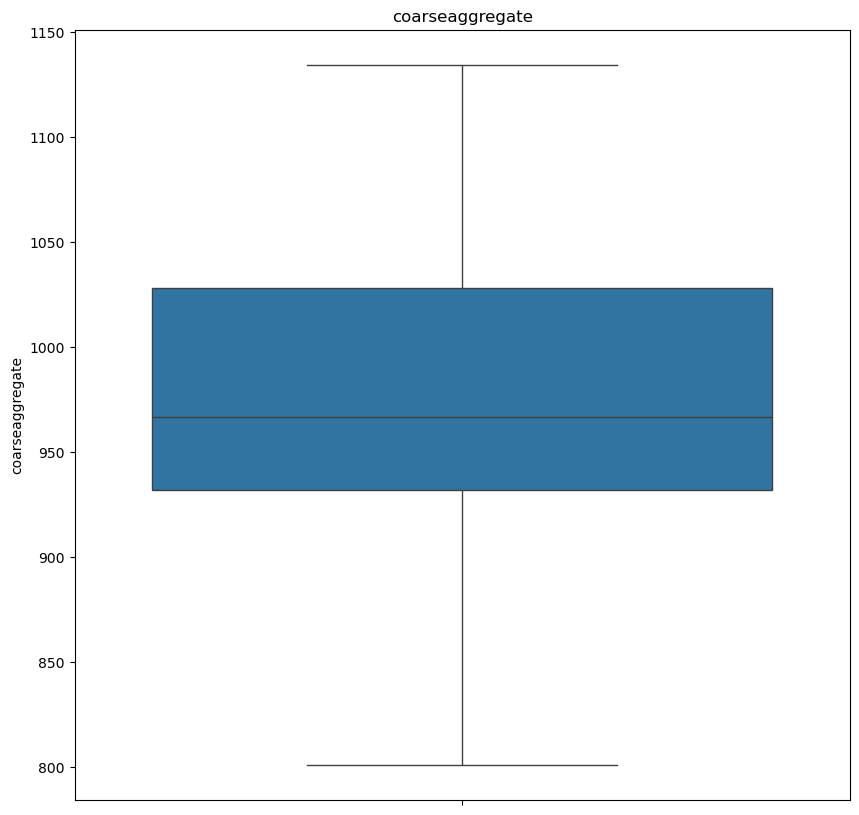

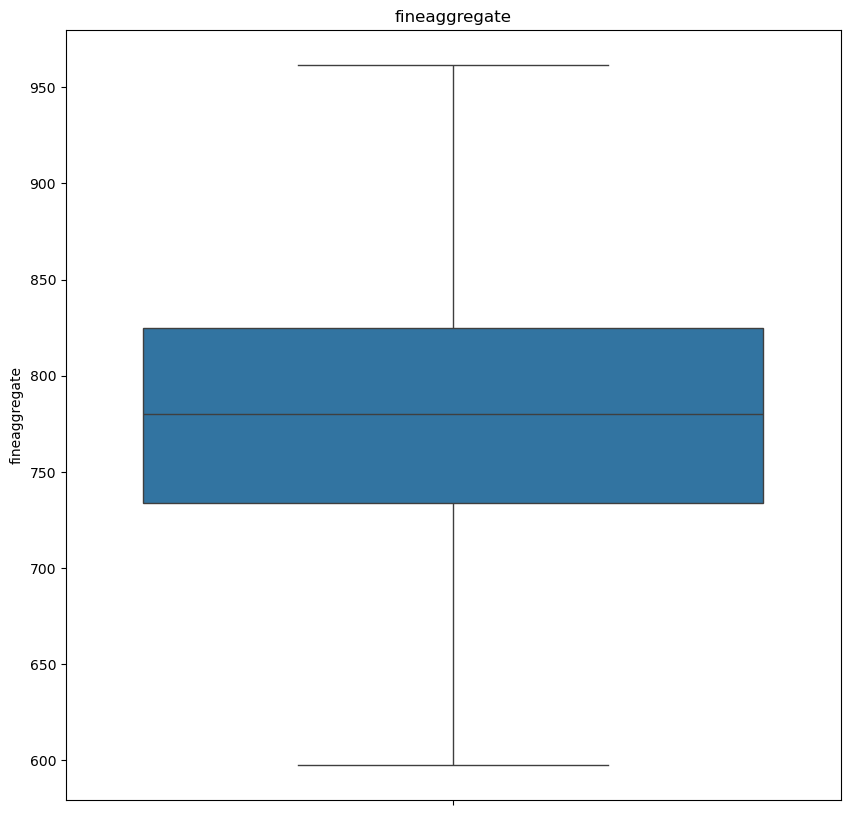

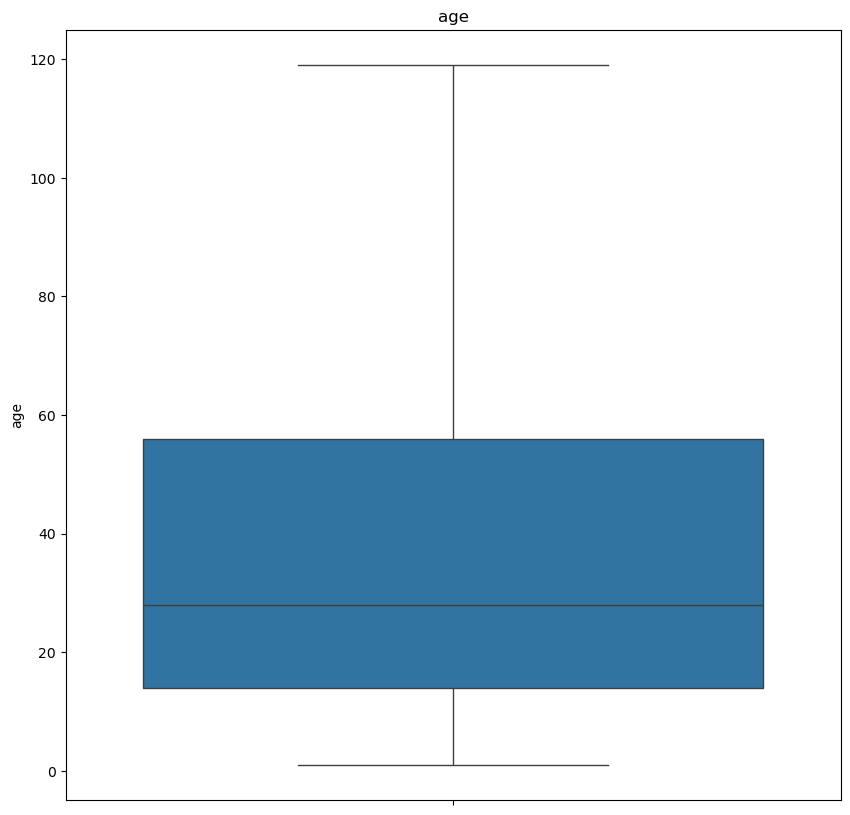

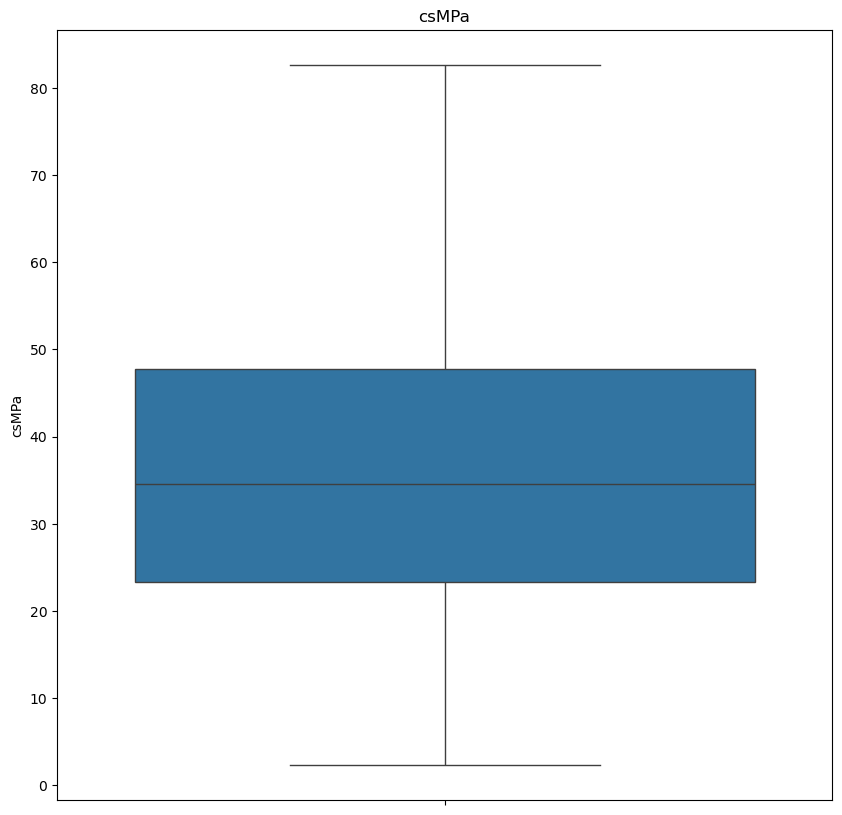

In [24]:
for feature in numerical_features:
    plt.figure(figsize=(10,10))
    sns.boxplot(df[feature])
    plt.title(feature)

In [25]:
# list of numerical Features with Null values:

numerical_features_with_null = [feature for feature in numerical_features if df[feature].isnull().sum()]
numerical_features_with_null 

[]

In [26]:
# Filling null values uisng mean: 

for feature in numerical_features_with_null:
    mean_value = df[feature].mean()
    df[feature].fillna(mean_value,inplace=True) 

In [27]:
df.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [28]:
df.head() 

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,184.0,86.0,190.0,213.0,6.0,923.0,623.0,28,22.93
1,313.3,145.0,0.0,178.5,8.0,1001.9,688.7,28,41.05
2,387.0,20.0,94.0,157.0,13.9,938.0,845.0,7,45.90
3,162.0,214.0,164.0,202.0,10.0,820.0,680.0,28,30.65
4,252.3,0.0,98.8,146.3,14.2,987.8,889.0,14,42.29


<Axes: xlabel='csMPa'>

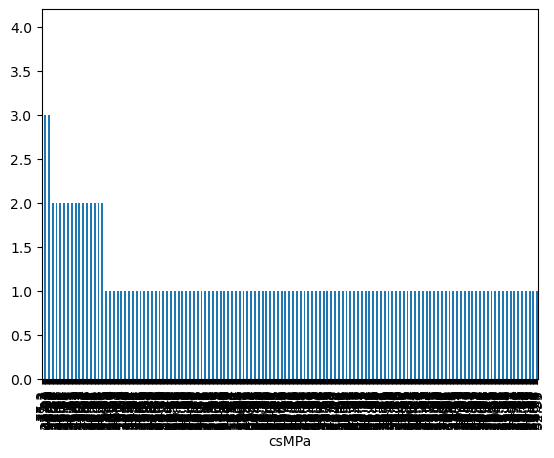

In [29]:
df['csMPa'].value_counts().plot(kind='bar') 

array([[<Axes: title={'center': 'cement'}>,
        <Axes: title={'center': 'slag'}>,
        <Axes: title={'center': 'flyash'}>],
       [<Axes: title={'center': 'water'}>,
        <Axes: title={'center': 'superplasticizer'}>,
        <Axes: title={'center': 'coarseaggregate'}>],
       [<Axes: title={'center': 'fineaggregate'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'csMPa'}>]], dtype=object)

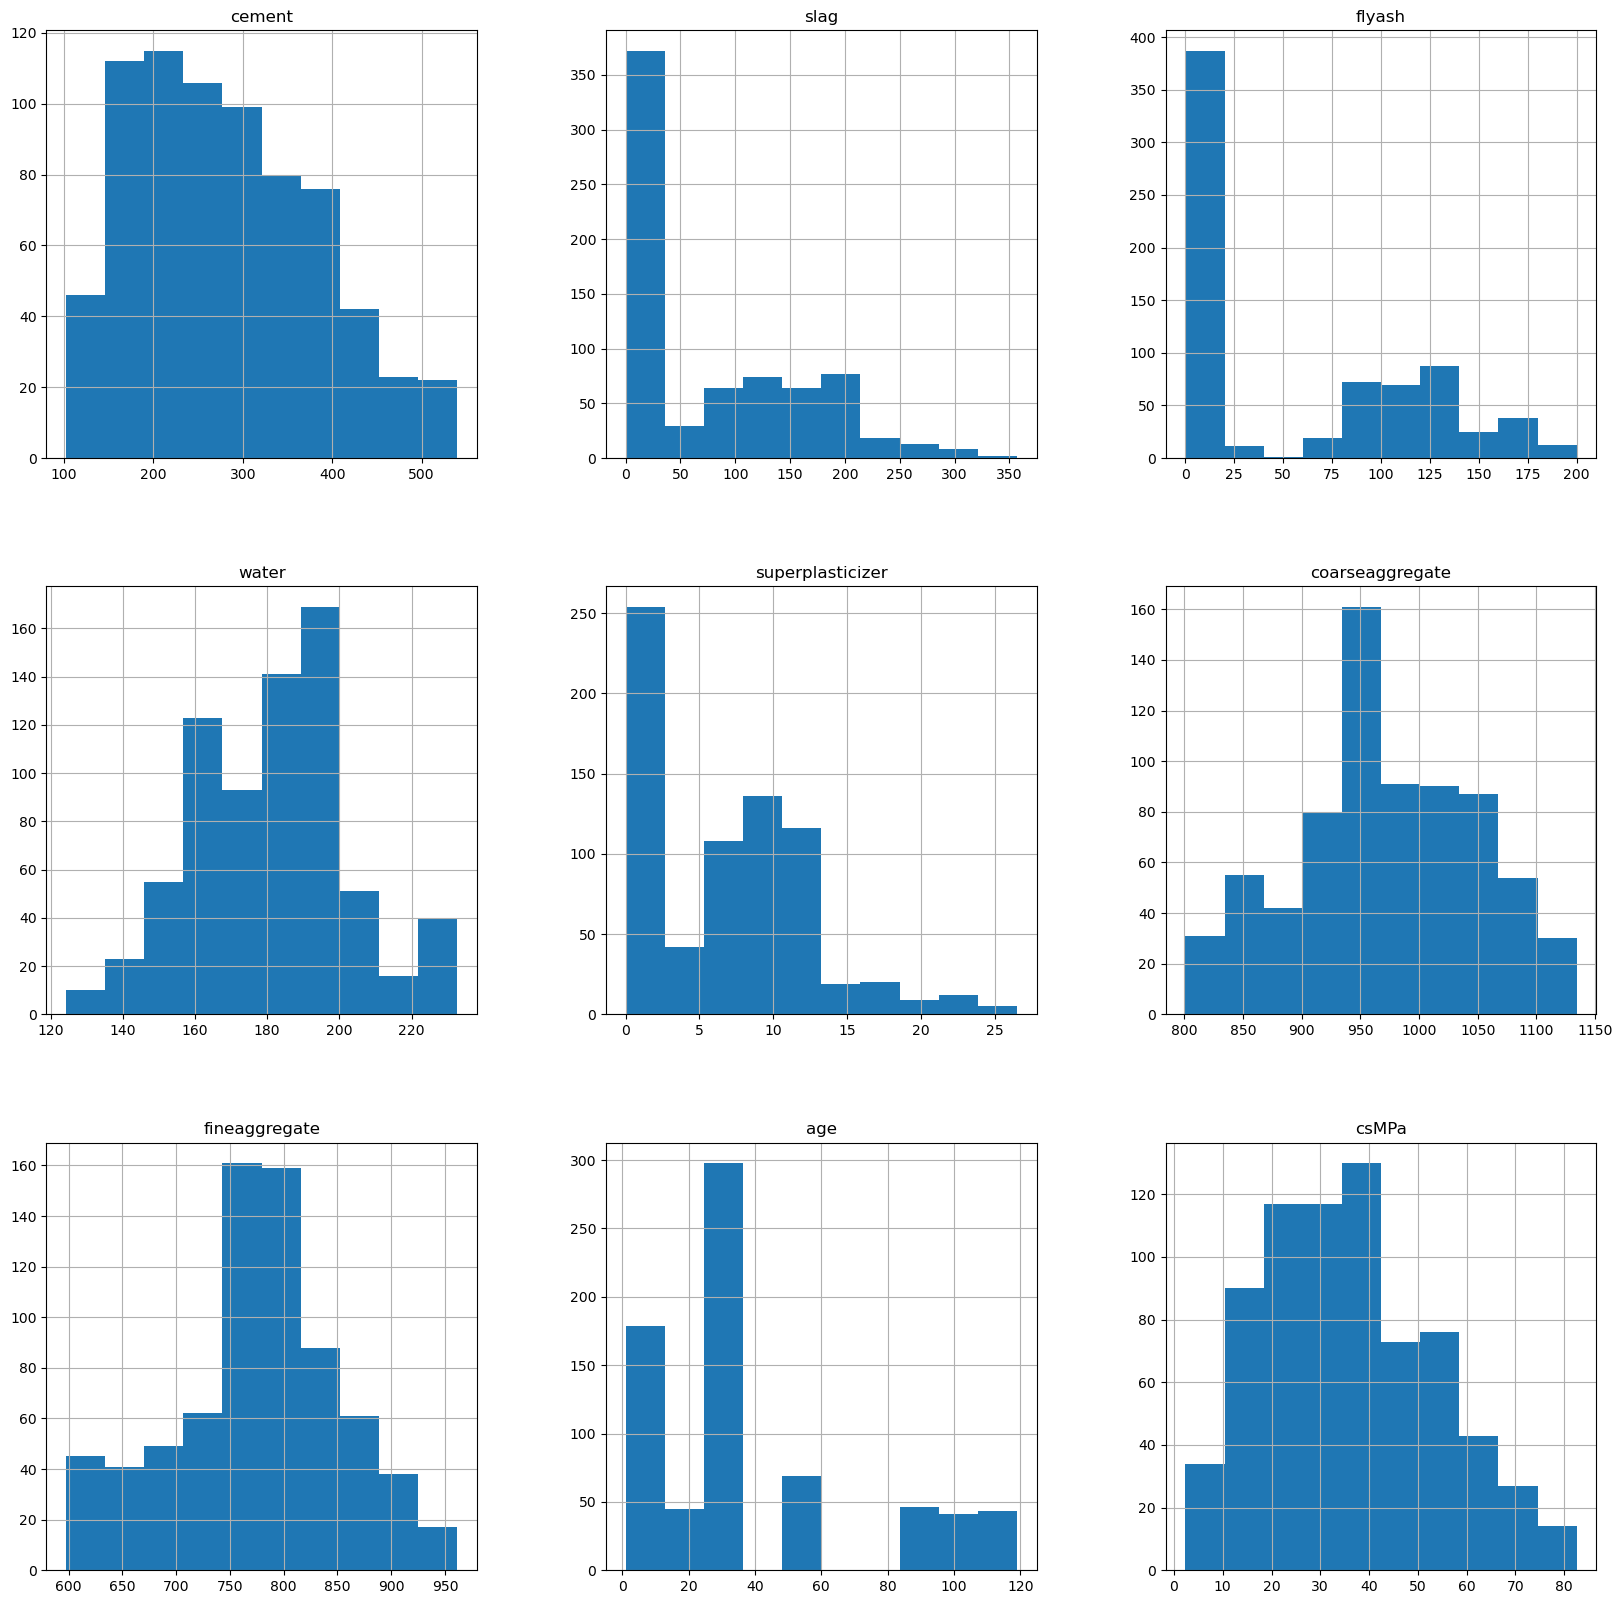

In [30]:
num_features = ['cement','slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age','csMPa']
df[num_features].hist(bins=10,figsize=(20,20))

In [31]:
# Choosing X and y 

X = df.drop('csMPa', axis=1)
y = df.csMPa

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42) 

In [33]:
X_train 

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
104,277.1,0.0,97.4,160.6,11.8,973.9,875.6,100
114,194.7,0.0,100.5,165.6,7.5,1006.4,905.9,3
647,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,119
425,339.0,0.0,0.0,185.0,0.0,1069.0,754.0,28
676,312.7,144.7,0.0,127.3,8.0,999.7,822.2,28
...,...,...,...,...,...,...,...,...
71,214.9,53.8,121.9,155.6,9.6,1014.3,780.6,100
106,485.0,0.0,0.0,146.0,0.0,1120.0,800.0,28
270,298.0,0.0,107.0,186.0,6.0,879.0,815.0,28
435,310.0,0.0,0.0,192.0,0.0,1012.0,830.0,28


In [34]:
df = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\test.csv") 

In [35]:
df.shape

(309, 9)

In [36]:
df.columns

Index(['Row ID', 'cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age'],
      dtype='object')

In [37]:
df.dtypes.value_counts() 

float64    7
int64      2
Name: count, dtype: int64

In [38]:
df.isna().sum()


Row ID              0
cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
dtype: int64

In [39]:
# Dropping Row ID from dataset

df.drop(['Row ID'], axis=1, inplace = True) 

In [40]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
cement,309.0,282.423625,107.846714,108.3,190.3,272.8,342.0,540.0
slag,309.0,71.934628,87.728948,0.0,0.0,17.5,143.0,359.4
flyash,309.0,52.588350,65.593290,0.0,0.0,0.0,118.3,200.1
water,309.0,182.821359,20.815708,121.8,168.0,185.7,192.9,246.9
superplasticizer,309.0,5.508091,5.874314,0.0,0.0,5.8,9.7,32.2
coarseaggregate,309.0,976.459223,80.569497,801.0,932.0,971.8,1040.0,1145.0
fineaggregate,309.0,769.974757,83.125146,594.0,728.9,778.0,822.0,945.0
age,309.0,47.320388,69.224960,1.0,7.0,28.0,56.0,365.0


In [41]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train) 

LinearRegression()

In [42]:
pred_t = lm.predict(X_test)

In [90]:
print("R^2 on training  data ",lm.score(X_train, y_train))
print("R^2 on testing data ",lm.score(X_test,y_test)) 

R^2 on training  data  0.7413326524385018
R^2 on testing data  0.7735815765888862


In [92]:
mse = mean_squared_error(y_test, pred_t)
rmse = np.sqrt(mse)
rmse

8.154721756668149